# **Context** 

Medicon, a pharmaceutical company, has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. **This vaccine was clinically tested last quarter and around 200,000 doses have already been given to people in five batches.**

Now, the sixth batch of doses needs to be tested for their **time of effect** (measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects**, such as antibody creation, to manifest), as well as for **quality assurance** (which tells you whether the dose will be able to do a satisfactory job or not).

I am working with the quality assurance team of Medicon and want to understand the quality of the sixth batch so that the company can plan for the next batch of doses. 

**Note:** Please note that this is not a clinical trial, the vaccine has already cleared clinical trials. This test is to ensure the quality and effectiveness of the sixth batch.

## **Goal** 

The previous analysis found that a dose is **ten times** more likely to produce a satisfactory result than not. I will solve **3 problems** statistically, one by one. 

<br>

**Note:** Here, a satisfactory job for the vaccine means that the dose **has successfully prevented COVID-19** - which is assumed to have taken place if the person does not show any symptoms or side effects after 14 days have passed since the vaccine dose was administered.

## **Importing Libraries**

In [26]:
# import the important libraries
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for visualization
import seaborn as sns  # library for visualization
%matplotlib inline
import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Problem 1
**(a) The quality assurance team has collected the 100 volunteers who were ready for the trial of this new batch and given one dose to each volunteer. Calculate the probability that k doses will do a satisfactory job out of 100 doses given to the volunteers.**

This situation follows the Binomial distribution because I am taking a random sample of 100 doses and each dose either does a satisfactory job or doesn't.


Assumptions of the binomial distribution:

*  There are only two possible outcomes (success or failure) for each trial – A dose will do a satisfactory job or not (yes or no).

* The number of trials (n) is fixed - A  sample of size 100 is taken. Each dose in the sample represents a trial.

* Each trial is independent of the other trials - It is reasonable to assume that giving a dose to each person is independent.

* The probability of success (p) is the same for each trial - The probability of success for each trial (a dose will not do a satisfactory job) is not known.


Let $p$ be the probability that a dose will not do a satisfactory job.

The quality assurance team checked on five batches of doses and found that - it is 10 times more likely that a dose will be able to produce a satisfactory result than not. So, the probability that a dose will do a satisfactory job is $10p$.

According to the rules of probability,

$p + 10p = 1$

$=> 11p = 1$

$=> p = 1/11$

$=> p = 0.09$

Hence, the probability of success for each trial (a dose will not do a satisfactory job) is **0.09**.

**I will now estimate the probability distribution of doses and plot them.**

In [27]:
# Sample size in variable that represents the number of doses given to the volunteers 
n=100

In [28]:
# p is the probability of success i.e. the probability that a dose **will not** do a satisfactory job
p=0.09

In [29]:
# Number of doses in a Numpy array
k=np.arange(0,101)
k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [30]:
# import the binomial function from the scipy library
from scipy.stats import binom

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

In [31]:
binomial

array([8.01935118e-005, 7.93122644e-004, 3.88281470e-003, 1.25444783e-002,
       3.00860701e-002, 5.71304716e-002, 8.94625517e-002, 1.18815257e-001,
       1.36604904e-001, 1.38106057e-001, 1.24295451e-001, 1.00578737e-001,
       7.37761613e-002, 4.93919862e-002, 3.03562992e-002, 1.72130224e-002,
       9.04393005e-003, 4.41965812e-003, 2.01555838e-003, 8.60313523e-004,
       3.44598109e-004, 1.29832882e-004, 4.61094802e-005, 1.54652915e-005,
       4.90725596e-006, 1.47541234e-006, 4.20922794e-007, 1.14096288e-007,
       2.94196474e-008, 7.22392251e-009, 1.69087417e-009, 3.77614579e-010,
       8.05283837e-011, 1.64113789e-011, 3.19846848e-012, 5.96511861e-013,
       1.06519975e-013, 1.82226034e-014, 2.98791675e-015, 4.69782347e-016,
       7.08545353e-017, 1.02550118e-017, 1.42475439e-018, 1.90064347e-019,
       2.43514011e-020, 2.99709552e-021, 3.54410483e-022, 4.02720353e-023,
       4.39783902e-024, 4.61580772e-025, 4.65638625e-026, 4.51491879e-027,
       4.20769059e-028, 3

The **binomial** variable is the array of probabilities for the different number of doses that will not do a satisfactory job.

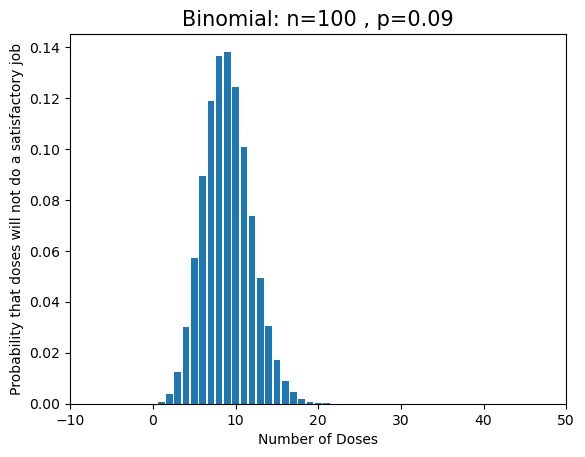

In [32]:
# Plot the distribution
plt.bar(k,binomial)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
plt.show()

**(b) What is the probability that exactly 3 doses will not be able to do a satisfactory job?**

In [33]:
binomial[3]

0.012544478265088905

The probability of exactly 3 doses not doing a satisfactory job is **0.0125** i.e. 1.25%.

**(c) What is the probability that at most 3 doses will not do the satisfactory job out of 10 selected?**

First, I need to calculate $P(X<=3)$. Here, $X$ is the random variable that represents the number of doses that will not do a satisfactory job. 

CDF is used to calculate the cumulative probability.

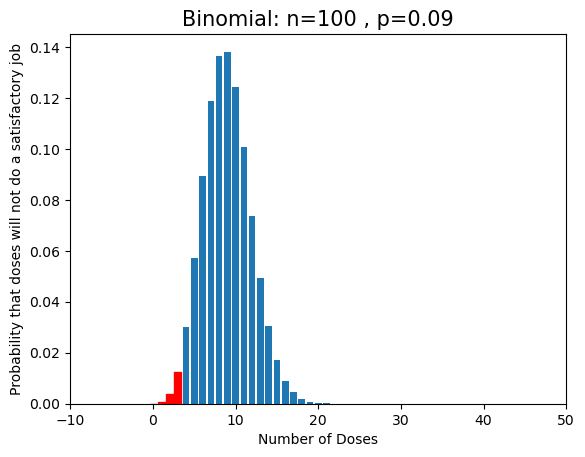

In [34]:
# Plot the probability distribution
barl=plt.bar(k,binomial)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(0,4):
    barl[i].set_color('r')
plt.show()

In the above graph, the red region represents $P(X<=3)$.

Now, the probability that out of 100 randomly selected doses, at most 3 will not do a satisfactory job is:

In [35]:
# Calculate the cdf
from scipy.stats import binom
prob_atmost3 = binom.cdf(k = 3 ,n = n, p = p)
print(prob_atmost3)

0.017300609121718068


* The probability of at most 3 doses will not do a satisfactory job is **0.0173** i.e. 1.73%.

## **Problem 2**

**The New York city administration wants to buy 200 Doses for Health care workers who were COVID-Positive. They have contacted the company and requested 200 Doses. What is the probability that at least 30 doses will not do a satisfactory job out of 200 doses?**


First, I need to calculate the probability for $P(X>=30)$. Here, $X$ is the random variable that represents doses that will not do a satisfactory job. 

CDF is used to calculate the cumulative probability.

In [36]:
# Sample size which represents the number of doses selected randomly
n = 200

# Probability of success, i.e., the probability that a dose will not do a satisfactory job
p = 0.09

# Different number of doses in a Numpy array
k = np.arange(0,201)
k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [37]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

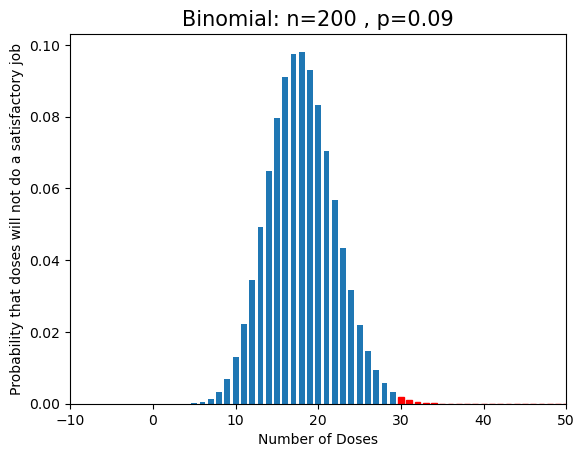

In [38]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
barl=plt.bar(k,binomial,width=0.7)
plt.xlim(-10,50)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(30,201):
    barl[i].set_color('r')
plt.show()

In the above graph, the red region represents $P(X>=30)$. 

binom.cdf() will be used for this because $P(X>=30) = 1 - P(X<30)$

In [39]:
# cdf
prob_atleast30 = 1-binom.cdf(k = 29 , n = 200, p = 0.09)
print(prob_atleast30)

0.003963863923503452


The probability of at least 30 doses not doing a satisfactory job is **0.003** i.e. ~0.3%.

## **Problem 3**

**The quality assurance team wants to analyze the time of effect for doses. So, they have collected 50 volunteers with the help of the city administration and given one dose to each volunteer.** 

Note: Data of these 50 doses are in the 'doses.csv' file.

In [40]:
# Import the dataset
drug = pd.read_csv('doses.csv')
drug.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


In [41]:
# Dataset overview
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


There are **no null values** present in any of the columns.

In [48]:
# Calculate mean and standard deviation
from scipy.stats import norm 

mu = drug['time_of_effect'].mean() 
sigma = drug['time_of_effect'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


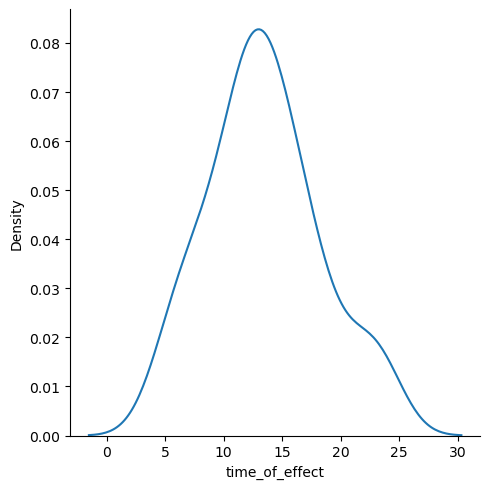

In [43]:
# Plotting the distribution
import seaborn as sns
sns.displot(drug['time_of_effect'],kind="kde")

The shape of the distribution is not perfectly normal because I have just 50 observations in the sample. But, I can assume this data distribution to be normal and perform my calculations based on the normality assumption.

**a) What is the probability that the time of effect is less than 11.5 hours?**

In [44]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob = norm.cdf(11.5, mu, sigma)
print('The probability that a dose will take less than 11.5 hours is', round(prob, 4))

The probability that a dose will take less than 11.5 hours is 0.3412


**b) What is the 90th percentile of the time of effect for doses?**

In [45]:
perc_90th = norm.ppf(0.90, mu, sigma)

In [46]:
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2))

The 90th percentile of the time of effect for doses is 19.52


**c) For the effectiveness test of the vaccine, estimate the range in which the population mean (effective time) will lie with a 95% confidence level.**

The population standard deviation is not known here. Therefore, I will calculate the confidence interval using the t-distribution.

In [47]:
# import the required function
from scipy.stats import t

# set the values of the sample mean and sample standard deviation
x_bar, s = mu, sigma

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df = k, loc = x_bar, scale = s/np.sqrt(n)), 2)

array([12.09, 14.79])

* **95% of the time**, the mean effective time of doses will be between **12.09 hours and 14.79 hours.**

# The End